**"Clasificación y segmentación de clientes mediante algoritmos de Machine Learning"**

Proyecto Personal

**Resumen**: Realizaremos la exploración de los datos y preprocesamiento del dataset 'Customer Segmentation Classification' encontrado en Kaggle, para luego realizar un modelo predictivo y generar una comparativa entre los modelos regresión logística y el modelo Naive Bayes en base al accuracy obtenido para poder visualizar cual fue el mejor modelo al predecir la categoría económica a la que pertenecen los clientes.

**Situación problemática**: Actualmente, la organización esta interesada en conocer mejor a sus clientes. La empresa de automóviles tiene planes de ingresar a nuevos mercados con sus productos existentes, y han deducido que el comportamiento del nuevo mercado es similar al mercado existente. Para ello, planea utilizar la misma estrategia que utilizaban y busca segmentar a los clientes (A, B, C, D).

**Objetivo general**: Desarrollar y comparar los algoritmos de clasificación de segmentación de clientes basado en los modelos regresión logística y Naive Bayes

*Metodología KDD PROCESS*

<img src="https://www.researchgate.net/profile/Ily-Ahmad-Sabri/publication/334784343/figure/fig1/AS:786618394886146@1564555848887/Knowledge-Discovery-Database-KDD-Process.png" height="400">


#**Selección de datos**

In [ ]:
#importamos las librerías básicas a utilizar y el dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

dataset = pd.read_csv('https://raw.githubusercontent.com/SergioGerman412/Datasets/main/Curso%20Machine%20Learning/proyecto_peadp.csv')
dataset

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
#eliminamos las variables que no son significativas en mi modelo predictivo
dataset.drop(['ID'], axis = 1,inplace=True) 

In [ ]:
dataset.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


**Interpretación**

1. En base al método "Count" , puedo analizar que tengo datos vacíos en la columna "Work_Experience y "Family_Size", y lo compruebo en la fase de preprocesamiento de acuerdo a la metodología planteada.
2. La media de "Age" es 43.466906, de "Work_Experience" es 2.641663 (la media es alrededor de 2 años y 6 meses de experiencia), y de Family_Size es 2.850123
3. No hay mucha varianza en los datos de "Work_Experience" y "Family_Size"
4. La edad minima es 18 años de edad (no hay menores de edad ya que es datos de clientes de vehiculos)
6. Se ilustra el primer, segundo y tercer percentil en la tabla 
7. La edad máxima de los clientes es de 89 años, los años de experiencia máximas de los clientes es de 14

##**Gráfica para conocer mi data**

<Axes: xlabel='Segmentation', ylabel='count'>

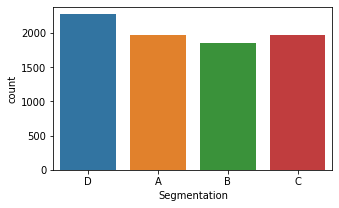

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x = 'Segmentation', data = dataset)


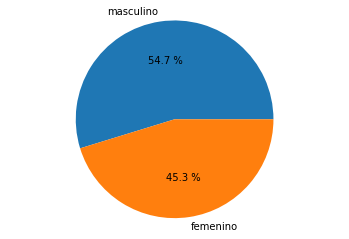

In [ ]:
#gráfica para visualizar el género
import matplotlib.pyplot as plt

Genero = [len(dataset.query("Gender=='Male'")),len(dataset.query("Gender=='Female'")) ]
Datos = ["masculino","femenino"]
plt.pie(Genero, labels=Datos, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

<Axes: xlabel='Profession', ylabel='count'>

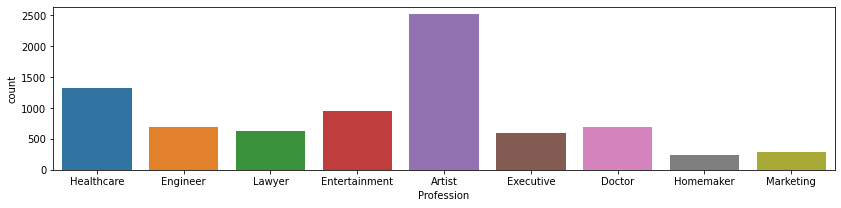

In [ ]:
plt.figure(figsize=(14,3))
sns.countplot(x = 'Profession', data = dataset)

In [ ]:
dataset.Profession.value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

#**Pre-procesamiento de datos**


##Detectando valores nulos o vacíos y llenarlos

<Axes: >

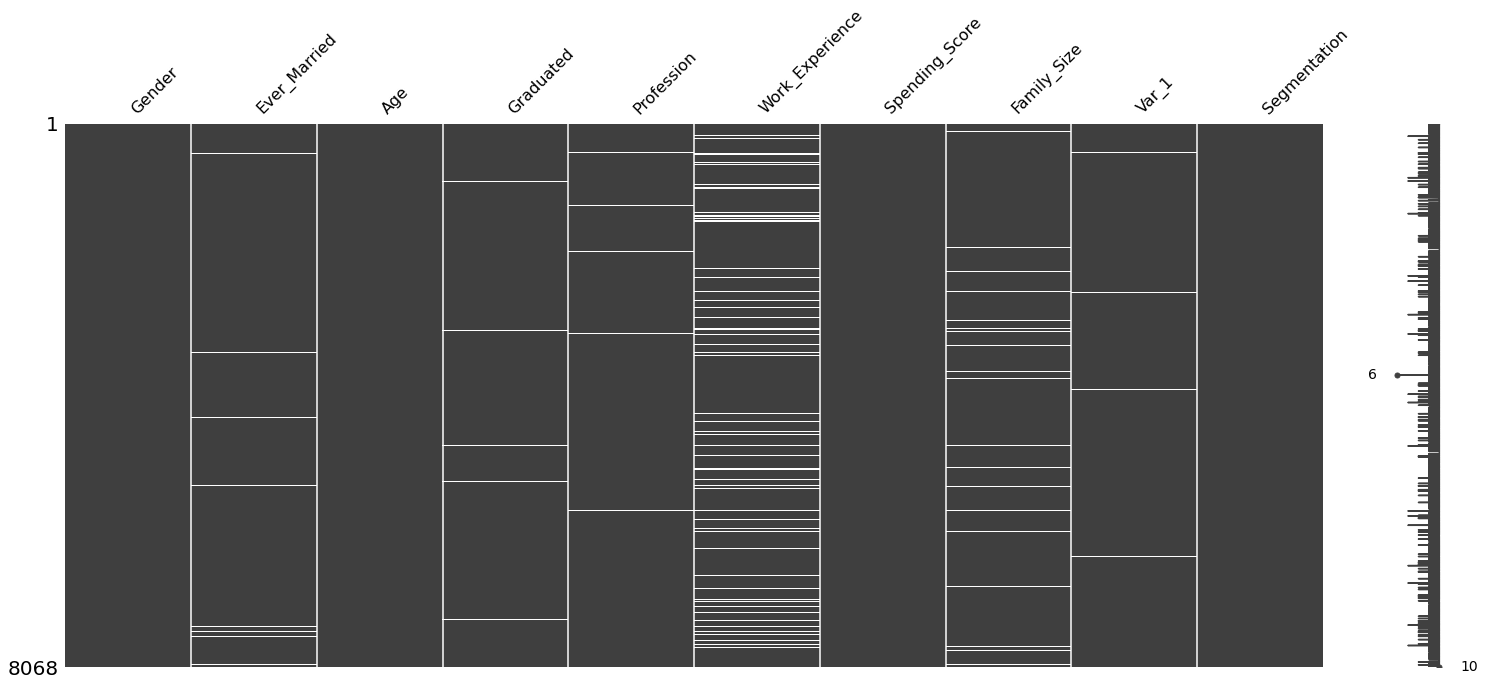

In [ ]:
#utilizando la librería missigno verificamos los datos nulos en el dataset
ms.matrix(dataset)

Interpretación
Utilizando la librería **missigno** visualizamos que hay datos nulos o vacíos en la variable "Ever_Married", "Graduated", "Profession", "Work_Experience", "Family_Size" y "Var_1". Se aprecia mejor la cantidad en el código de abajo

In [ ]:
#Elaboramos un bucle (repeticiones) para evaluar en cada columna isna y sum
for col in dataset.loc[:, dataset.isna().any()].columns:                                     
  print('En la columna',col,'hay',dataset[col].isna().sum(),'valores nulos')

En la columna Ever_Married hay 140 valores nulos
En la columna Graduated hay 78 valores nulos
En la columna Profession hay 124 valores nulos
En la columna Work_Experience hay 829 valores nulos
En la columna Family_Size hay 335 valores nulos
En la columna Var_1 hay 76 valores nulos


In [ ]:
dataset_clean = dataset.dropna()
dataset_clean.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

##Verificar datos duplicados

In [ ]:
dataset_clean.duplicated().sum()

392

In [ ]:
dataset_clean1 = dataset_clean.drop_duplicates()

In [ ]:
dataset_reset = dataset_clean1.reset_index(drop=True)
dataset_reset.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
2,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
3,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
4,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


##Feature engineering

In [ ]:
dataset_reset["Etapa_edad"] = ""

- 18 adolescencia 

- 19 a 26 juventud

- 27 a 39 adultez

- 40 a 59 adultez media

- 60 a más senectud


In [ ]:
dataset_reset.loc[dataset_reset.Age==18,'Etapa_edad']='adolescencia'
dataset_reset.loc[dataset_reset.Age>59,'Etapa_edad']='senectud'

In [ ]:
dataset_reset.loc[dataset_reset.Age==19,'Etapa_edad']='juventud'
dataset_reset.loc[dataset_reset.Age==20,'Etapa_edad']='juventud'
dataset_reset.loc[dataset_reset.Age==21,'Etapa_edad']='juventud'
dataset_reset.loc[dataset_reset.Age==22,'Etapa_edad']='juventud'
dataset_reset.loc[dataset_reset.Age==23,'Etapa_edad']='juventud'
dataset_reset.loc[dataset_reset.Age==24,'Etapa_edad']='juventud'
dataset_reset.loc[dataset_reset.Age==25,'Etapa_edad']='juventud'
dataset_reset.loc[dataset_reset.Age==26,'Etapa_edad']='juventud'

In [ ]:
dataset_reset.loc[dataset_reset.Age==27,'Etapa_edad']='adultez'
dataset_reset.loc[dataset_reset.Age==28,'Etapa_edad']='adultez'
dataset_reset.loc[dataset_reset.Age==29,'Etapa_edad']='adultez'
dataset_reset.loc[dataset_reset.Age==30,'Etapa_edad']='adultez'
dataset_reset.loc[dataset_reset.Age==31,'Etapa_edad']='adultez'
dataset_reset.loc[dataset_reset.Age==32,'Etapa_edad']='adultez'
dataset_reset.loc[dataset_reset.Age==33,'Etapa_edad']='adultez'
dataset_reset.loc[dataset_reset.Age==34,'Etapa_edad']='adultez'
dataset_reset.loc[dataset_reset.Age==35,'Etapa_edad']='adultez'
dataset_reset.loc[dataset_reset.Age==36,'Etapa_edad']='adultez'
dataset_reset.loc[dataset_reset.Age==37,'Etapa_edad']='adultez'
dataset_reset.loc[dataset_reset.Age==38,'Etapa_edad']='adultez'
dataset_reset.loc[dataset_reset.Age==39,'Etapa_edad']='adultez'

In [ ]:
dataset_reset.loc[dataset_reset.Age==40,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==41,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==42,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==42,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==43,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==44,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==45,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==46,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==47,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==48,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==49,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==50,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==51,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==52,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==53,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==54,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==55,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==56,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==57,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==58,'Etapa_edad']='adultez_media'
dataset_reset.loc[dataset_reset.Age==59,'Etapa_edad']='adultez_media'

<Axes: xlabel='Etapa_edad', ylabel='count'>

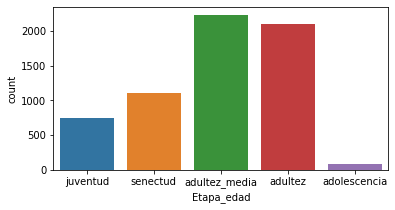

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'Etapa_edad', data = dataset_reset)

In [ ]:
dataset_reset.Etapa_edad.value_counts()

adultez_media    2232
adultez          2093
senectud         1110
juventud          751
adolescencia       87
Name: Etapa_edad, dtype: int64

##Influencia de las variables con el target

<Axes: xlabel='Segmentation'>

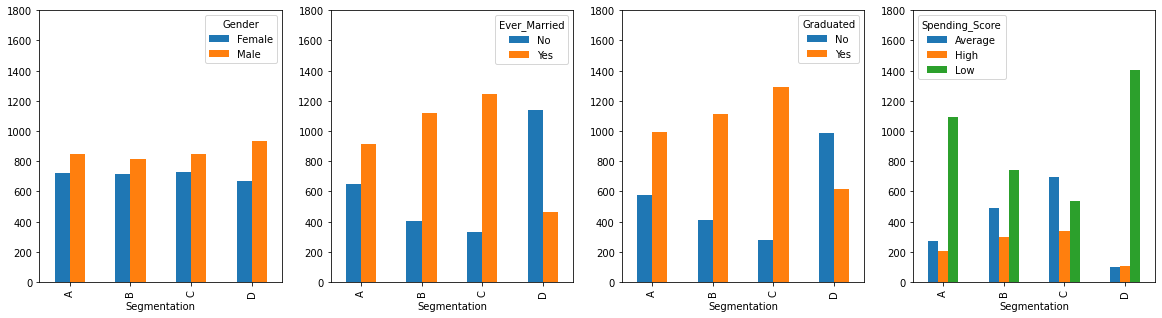

In [ ]:
#revisando las influencias de mis variables

fig,(ax1, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(dataset_reset['Segmentation'],dataset_reset['Gender']).plot(kind='bar',ax=ax1, ylim=[0,1800])
pd.crosstab(dataset_reset['Segmentation'],dataset_reset['Ever_Married']).plot(kind='bar',ax=ax2, ylim=[0,1800])
pd.crosstab(dataset_reset['Segmentation'],dataset_reset['Graduated']).plot(kind='bar',ax=ax3, ylim=[0,1800])
pd.crosstab(dataset_reset['Segmentation'],dataset_reset['Spending_Score']).plot(kind='bar',ax=ax4, ylim=[0,1800])

<Axes: xlabel='Segmentation', ylabel='count'>

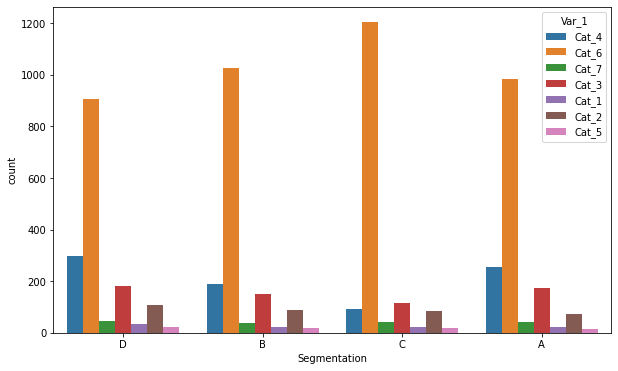

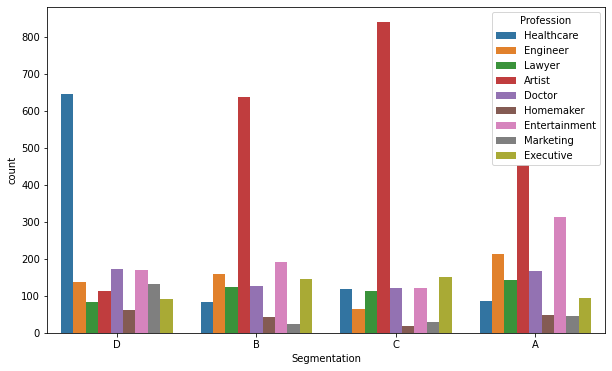

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Segmentation', data = dataset_reset, hue="Var_1")


plt.figure(figsize=(10,6))
sns.countplot(x = 'Segmentation', data = dataset_reset, hue="Profession")

<Axes: xlabel='Segmentation', ylabel='count'>

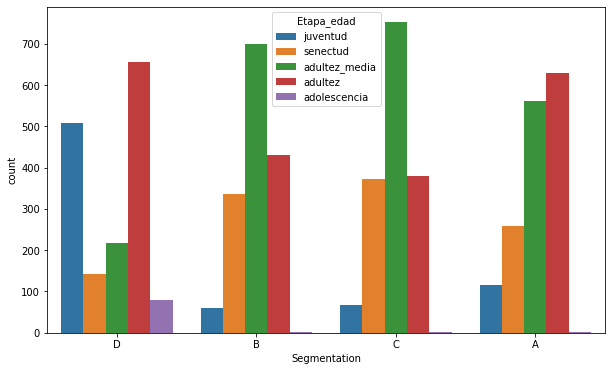

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Segmentation', data = dataset_reset, hue='Etapa_edad')

##Aplicando diccionario para Encodear

In [ ]:
data = dataset_reset.copy()

In [ ]:
# Para tener al final la VARIABLE OBJETIVO
df_categorical = data[['Gender', 'Ever_Married', 'Graduated', 'Etapa_edad','Profession','Spending_Score','Var_1', 'Segmentation']]

In [ ]:
df_categorical.head(2)

In [ ]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame() 
# RECORREMOS CADA COLUMNA DEL DF_categorical
for i in df_categorical.columns:
  df_categorical_encoded[i]=label.fit_transform(df_categorical[i])
df_categorical_encoded

,Gender,Ever_Married,Graduated,Etapa_edad,Profession,Spending_Score,Var_1,Segmentation
0,1,0,0,3,5,2,3,3
1,0,1,1,4,2,2,5,1
2,1,1,1,4,7,1,5,1
3,1,1,0,2,0,0,5,2
4,1,0,1,1,5,2,5,2
...,...,...,...,...,...,...,...,...
6268,1,1,0,4,0,0,5,2
6269,1,1,1,2,0,1,5,1
6270,1,0,0,1,4,2,3,3
6271,0,0,1,1,5,2,5,1


In [ ]:

#cat_to_nums = {"Gender":  {"Male": 1, "Female": 3},
               #"Ever_Married":  {"Yes": 1, "No": 3},
               #"Graduated":  {"Yes": 1, "No": 3},
               #"Profession":  {"Artist": 1, "Healthcare": 2, "Doctor": 3, "Entertainment": 4, "Engineer": 5, "Lawyer": 6, "Executive": 7, "Marketing": 8, "Homemaker": 9 },
               #"Spending_Score":  {"Low": 1, "Average": 2, "High": 3},
               #"Var_1":  {"Cat_1": 1, "Cat_2": 2, "Cat_3": 3, "Cat_4": 4, "Cat_5": 5, "Cat_6": 6, "Cat_7": 7},    
               #"Segmentation":  {"A": 1, "B": 2, "C": 3, "D": 4}}
#dataset_clean1.replace(cat_to_nums, inplace = True)
             

In [ ]:
data.head(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Etapa_edad
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,juventud
1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,senectud


In [ ]:
#convertimos los datos float a int de la columna Family_Size y Work_Experience
data["Family_Size"] = data.Family_Size.astype(int)
data["Work_Experience"] = data.Work_Experience.astype(int)


In [ ]:
#reemplazo los datos encodeados a la data original
data["Gender"] = df_categorical_encoded.Gender
data["Ever_Married"] = df_categorical_encoded.Ever_Married
data["Graduated"] = df_categorical_encoded.Graduated
data["Profession"] = df_categorical_encoded.Profession
data["Spending_Score"] = df_categorical_encoded.Spending_Score
data["Etapa_edad"] = df_categorical_encoded.Etapa_edad
data["Var_1"] = df_categorical_encoded.Var_1
data["Segmentation"] = df_categorical_encoded.Segmentation

In [ ]:
data.head(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Etapa_edad
0,1,0,22,0,5,1,2,4,3,3,3
1,0,1,67,1,2,1,2,1,5,1,4


##Detectando Outliers




In [ ]:
boxplot1 = data.iloc[:, 0:5]
boxplot2 = data[['Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1','Etapa_edad']]

<Figure size 864x1152 with 0 Axes>

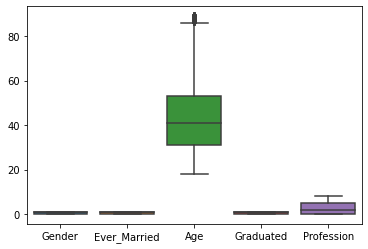

<Figure size 864x1152 with 0 Axes>

In [ ]:
sns.boxplot(data=boxplot1)
plt.figure(figsize=(12,16))

<Axes: >

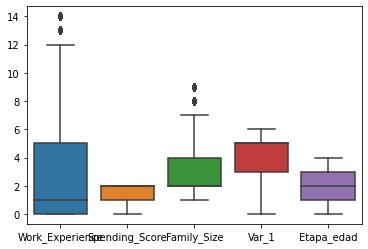

In [ ]:
sns.boxplot(data=boxplot2)

**análisis univariante**

In [ ]:
boxplot2['Work_Experience'].unique()

array([ 1,  0,  4,  9, 12,  3, 13,  5,  8, 14,  7,  2,  6, 10, 11])

In [ ]:
boxplot2['Family_Size'].unique()

array([4, 1, 2, 3, 5, 6, 8, 7, 9])

##Viendo correlaciones entre mis datos

<Axes: >

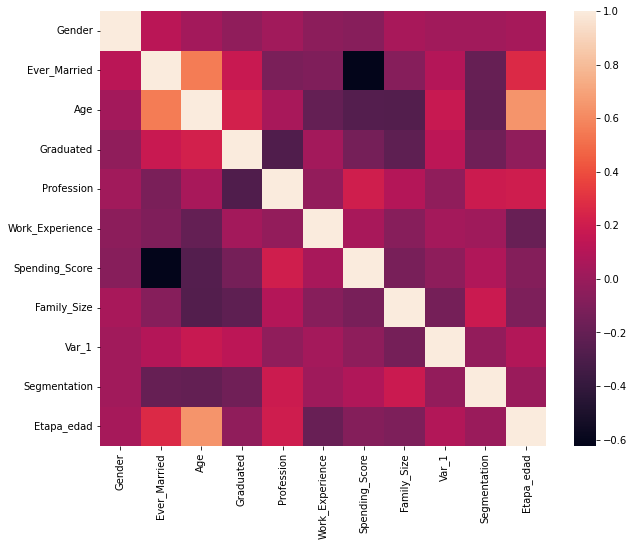

In [ ]:
corr_ = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_)

<ipython-input-49-924a01289ea3>:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))


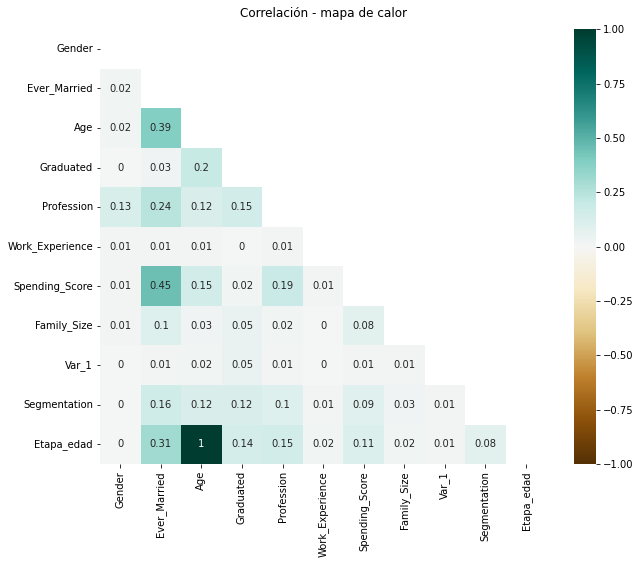

In [ ]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab) 
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

rows= []

for var1 in data:
  col = []
  for var2 in data :
    cramers =cramers_V(data[var1], data[var2]) 
    col.append(round(cramers,2)) 
  rows.append(col)

cramers_results = np.array(rows)

cramerv_matrix = pd.DataFrame(cramers_results, columns = data.columns, index =data.columns)
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))
plt.figure(figsize=(10,8))
cat_heatmap = sns.heatmap(cramerv_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
cat_heatmap.set_title('Correlación - mapa de calor', fontdict={'fontsize':12}, pad=12);


##Normalización

In [ ]:
data.head(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Etapa_edad
0,1,0,22,0,5,1,2,4,3,3,3
1,0,1,67,1,2,1,2,1,5,1,4


In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
data_to_norm  = [data['Segmentation']]

In [ ]:
data_normalizada  = normalize(data_to_norm )

In [ ]:
data = data.assign(Age = data_normalizada[0]) 
data.head(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Etapa_edad
0,1,0,0.020109,0,5,1,2,4,3,3,3
1,0,1,0.006703,1,2,1,2,1,5,1,4


#**Transformación**

**Definir x y del entrenamiento, partir la data en train y test**

In [ ]:
#definir x Y del entrenamiento
y = data.Segmentation

X = data.drop('Segmentation',axis=1)

In [ ]:
#dividir el dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
X.head(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Etapa_edad
0,1,0,0.020109,0,5,1,2,4,3,3
1,0,1,0.006703,1,2,1,2,1,5,4


In [ ]:
#Mostramos con el parámetro shape la cantidad de filas que resultaron en cada parte
print('Para el X_train:', X_train.shape, 'y para el y_train',y_train.shape)
print('Para el X_test:',X_test.shape,'y para el y_test',y_test.shape)

Para el X_train: (4391, 10) y para el y_train (4391,)
Para el X_test: (1882, 10) y para el y_test (1882,)


#**Minería de datos**

##Modelo Random Forest

- max_depth : profundidad máxima que puede alcanzar el árbol.
- n_jobs : número de cores empleados para el entrenamiento

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Importamos la librería para aplicar Random Forest
rf = RandomForestClassifier(n_jobs = -1,max_depth=3,random_state=1) #creamos la variable rf para guardar el modelo con los parámetros deseados
rf.fit(X_train,y_train) #entrenamos con datos guardados en X_train, y_train
rf_pred = rf.predict(X_test) #generamos las predicciones usando como variables predictoras los datos en X_test
rf_pred #mostramos las predicciones guardadas en la variable rf_pred

array([1, 1, 0, ..., 0, 3, 2])

*Probabilidades de la predicción sobre el target*

In [ ]:
#Calculamos la probabilidades con el método predict_proba
rf_prob = rf.predict_proba(X_test)[:,3]
rf_prob

array([0.0172466 , 0.04546496, 0.06821694, ..., 0.09873003, 0.81535051,
       0.11904484])

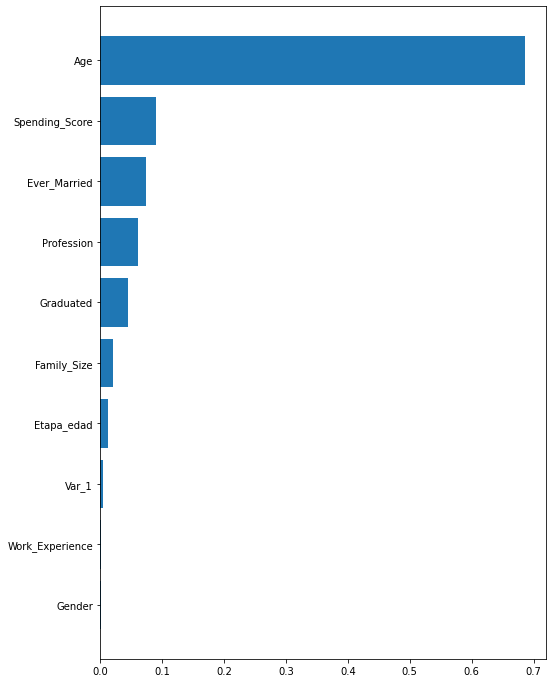

In [ ]:
#Graficamos la importancia de cada variable con gráfica de barras usando el método feature_importances_
pesos = rf.feature_importances_
cols = X_train.columns
plt.figure(figsize=(8,12))
indices = np.argsort(pesos)
plt.barh(range(len(indices)), pesos[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
#Calculamos el accuracy comparando las predicciones generadas versus y_test
print('El accuracy para mi primer modelo es :{0:.2f}'.format(accuracy_score(y_test,rf_pred))) #usando la expresión regex .2f para mostrar 2 decimales

El accuracy para mi primer modelo es :0.97


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

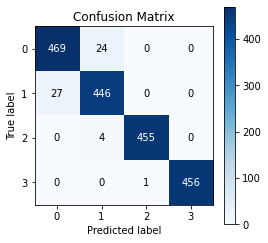

In [ ]:
!pip install -q scikit-plot 
import scikitplot as skplt #Importamos la librería skplt
skplt.metrics.plot_confusion_matrix(y_test,rf_pred, figsize=(4,4)) #Graficamos la matriz usando plot_confusion_matrix y los datos de y_test vs rf_pred

##Modelo Naive Bayes




In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbc = GaussianNB()

In [ ]:
nbc.fit(X_train,y_train)

GaussianNB()

*Predicción, reporte de clasificación y matriz de confusión*

In [ ]:
y_pred3 = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred3))
print("La cantidad total de puntos de datos mal etiquetados de {} muestras de prueba es {}".format(len(y_test),mislabel))

La cantidad total de puntos de datos mal etiquetados de 1882 muestras de prueba es 0


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

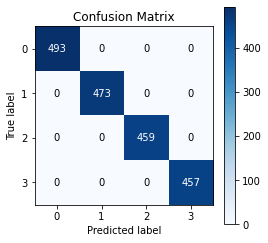

In [ ]:
!pip install -q scikit-plot
import scikitplot as skplt #Importamos la librería skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred3, figsize=(4,4)) 

In [ ]:
print('El accuracy para mi tercer modelo es :{0:.2f}'.format(accuracy_score(y_test,y_pred3))) #usando la expresión regex .2f para mostrar 2 decimales

El accuracy para mi tercer modelo es :1.00


#**Evaluación e interpretación**

##Matriz de confusión del Random Forest

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

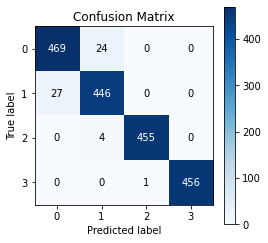

In [ ]:
import scikitplot as skplt #Importamos la librería skplt
skplt.metrics.plot_confusion_matrix(y_test,rf_pred, figsize=(4,4))

In [ ]:
#Calculamos el accuracy comparando las predicciones generadas versus y_test
print('El accuracy para mi primer modelo es :{0:.2f}'.format(accuracy_score(y_test,rf_pred))) #usando la expresión regex .2f para mostrar 2 decimales

El accuracy para mi primer modelo es :0.97


In [ ]:
rf_report1 = classification_report(y_test, rf_pred, target_names=['Clase A' , 'Clase B', 'Clase C', 'Clase D']) #Obtenemos las métricas de la matriz por Random Forest
print(rf_report1)

              precision    recall  f1-score   support

     Clase A       0.95      0.95      0.95       493
     Clase B       0.94      0.94      0.94       473
     Clase C       1.00      0.99      0.99       459
     Clase D       1.00      1.00      1.00       457

    accuracy                           0.97      1882
   macro avg       0.97      0.97      0.97      1882
weighted avg       0.97      0.97      0.97      1882



##Matriz de confusión del Naive Bayes

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

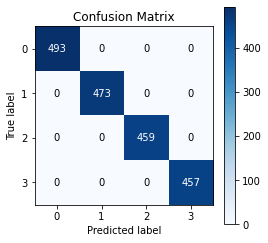

In [ ]:
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(y_test,y_pred3, figsize=(4,4))

In [ ]:
from sklearn.metrics import accuracy_score
print('El accuracy para mi tercer modelo es :{0:.2f}'.format(accuracy_score(y_test,y_pred3))) #usando la expresión regex .2f para mostrar 2 decimales

El accuracy para mi tercer modelo es :1.00


In [ ]:
rf_report2 = classification_report(y_test, y_pred3, target_names=['Clase A' , 'Clase B', 'Clase C', 'Clase D']) #Obtenemos las métricas de la matriz por Naive Bayes
print(rf_report2)

              precision    recall  f1-score   support

     Clase A       1.00      1.00      1.00       493
     Clase B       1.00      1.00      1.00       473
     Clase C       1.00      1.00      1.00       459
     Clase D       1.00      1.00      1.00       457

    accuracy                           1.00      1882
   macro avg       1.00      1.00      1.00      1882
weighted avg       1.00      1.00      1.00      1882

